# Solution

## Importing the required tools

In [1]:
from pyqec.sparse import BinaryMatrix, BinaryVector
from pyqec.classical import LinearCode, BinarySymmetricChannel
from pyqec.experiments import ClassicalDecodingExperiment, Laboratory

## A function to generate codes

In [2]:
def repetition_code(length):
    if length % 2 != 1:
        raise ValueError("length must be an odd integer")
    checks = [[i, i + 1] for i in range(length - 1)]
    parity_check_matrix = BinaryMatrix(length, checks)
    return LinearCode(parity_check_matrix, tag=f"n = {length}")

## The decoder

In [3]:
class MajorityDecoder:
    def __init__(self, code):
        self.code = code
        length = len(code)
        self.limit = (length - 1) / 2 
        self.zero_codeword = BinaryVector(length, list())
        self.one_codeword = BinaryVector(length, list(range(length)))

    def decode(self, message):
        if message.weight() > self.limit:
            return self.one_codeword
        else:
            return self.zero_codeword

## Running the experiments

In [4]:
def build_experiment(code_length, probability):
    code = repetition_code(code_length)
    decoder = MajorityDecoder(code)
    noise = BinarySymmetricChannel(probability)
    return ClassicalDecodingExperiment(code, decoder, noise)

laboratory = Laboratory(8) # I have 8 CPUs on my machine.

for length in range(1, 10, 2):
    for probability in (0.05 * p for p in range(1, 21)):
        laboratory.add_experiment(build_experiment(length, probability))

results = laboratory.run_all_experiments_n_times(1000)

## Visualization

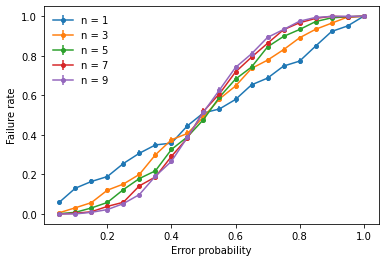

In [5]:
results.plot()

```{note}
As expected,
we can estimate from the plot that the threshold for the repetition code is \\(\frac{1}{2} \\).
```